In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import algos
import features
import parametric
import policy
import chicken
from agents import OffPolicyAgent
from rlbench import *

# Compare On-Policy LSTD with Every-Visit-MC

In [3]:
# define the experiment
num_states = 8
num_features = 8
max_steps = 10000

# set up environment
env = chicken.Chicken(num_states)

# set up policy
pol_mu = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})
pol_pi = policy.FixedPolicy({s: {0: 1} if s < 4 else {0: 0.5, 1: 0.5} for s in env.states})

# set feature mapping
# phi = features.RandomBinary(num_features, num_features // 2, random_seed=101011)
phi = features.Int2Unary(num_states)

# set up algorithms
update_params = {
    'alpha': 0.01,
    'gm': 0.9,
    'gm_p': 0.9,
    'lm': 0.0,
    'interest': 1.0,
}

# set up the agents
etd = OffPolicyAgent(algos.ETD(phi.length), pol_pi, pol_mu, phi, update_params)
lstd = OffPolicyAgent(algos.LSTD(phi.length), pol_pi, pol_mu, phi, update_params)

# run both agents through a trajectory
etd_steps = run_episode(etd, env, max_steps)
lstd_steps = run_episode(lstd, env, max_steps)

In [4]:
# Compute the value from Every-Visit-MC
mc_values = every_visit_mc(lstd_steps, update_params['gm'])
lstd_values = lstd.get_values(env.states)
etd_values = etd.get_values(env.states)

In [5]:
mc_values

{0: 0.060673259881757938,
 1: 0.067454065018290446,
 2: 0.074948961131433831,
 3: 0.083276623479370898,
 4: 0.092529581643745473,
 5: 0.14493194368996215,
 6: 0.26236215295236337,
 7: 0.53927655149102582}

In [6]:
lstd_values

{0: 0.059958347625307745,
 1: 0.066620386289186179,
 2: 0.074022651475614501,
 3: 0.082247390576444271,
 4: 0.091385989582697849,
 5: 0.14490582370706226,
 6: 0.27458967798609996,
 7: 0.55652661257289682}

In [7]:
etd_values

{0: 0.040777304879992732,
 1: 0.044492832067918202,
 2: 0.048401911642987065,
 3: 0.052802451114220814,
 4: 0.06879530470728222,
 5: 0.13147839824737265,
 6: 0.2423246758775526,
 7: 0.72723911963841115}

In [8]:
glst = stepwise_return(lstd_steps, update_params['gm'])

In [9]:
max(glst)

1.4304672908526719

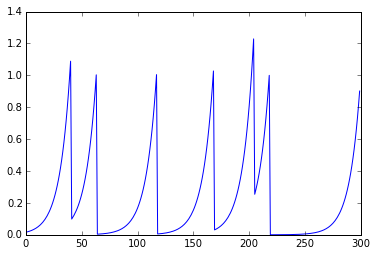

In [10]:
plt.plot(glst[:300])

In [11]:
def stepwise_predictions(steps, agent):
    return [agent.predict(s) for s in get_states(steps)]

In [12]:
xdata = [i for i in range(len(lstd_steps))]
y_etd = stepwise_predictions(lstd_steps, etd)
y_lstd = stepwise_predictions(lstd_steps, lstd)

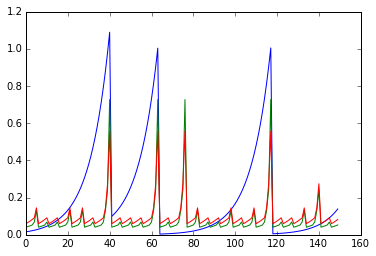

In [13]:
fig, ax = plt.subplots()
ax.plot(glst[:150])
ax.plot(y_etd[:150])
ax.plot(y_lstd[:150])